**Importing necessary Libraries** 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.utils import resample
from sklearn import metrics
from sklearn import svm

In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart-full.csv to heart-full (1).csv


In [3]:
import io
df3=pd.read_csv(io.BytesIO(uploaded['heart-full.csv']))

**Data Analysis and Cleaning**

In [4]:
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df1=df3.loc[(df3['sex']==0)&(df3['target']==1)]

In [6]:
df2=df3.loc[(df3['sex']==1)&(df3['target']==1)]

In [7]:
len(df1)

226

In [8]:
len(df2)

300

In [9]:
X=df3.drop('target', axis=1).copy()

In [10]:
y=df3['target'].copy()

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [12]:
X['ca'].unique()

array([2, 0, 1, 3, 4])

In [13]:
len(X.loc[(X['ca'])==4])

18

In [14]:
X['thal'].unique()

array([3, 2, 1, 0])

In [15]:
df_cleaned=df3.loc[(df3['ca'])!=4]

In [16]:
X1=df_cleaned.drop('target', axis=1).copy()

In [17]:
y1=df_cleaned['target'].copy()

In [18]:
len(y1)

1007

In [19]:
X_encoded=pd.get_dummies(X1, columns=['sex','cp','fbs','restecg','exang','thal'])

In [20]:
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
2,70,145,174,125,2.6,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,61,148,203,161,0.0,2,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,62,138,294,106,1.9,1,3,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0


Splitting the dataset into Training, testing and validation sets.

In [22]:
X_main, X_val, y_main, y_val=train_test_split(X_encoded, y1, random_state=42, train_size=0.85)

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X_main, y_main, test_size=0.2)

In [24]:
X_train_scaled=scale(X_train)             #Scaling the data for SVM
X_test_scaled=scale(X_test)
X_val_scaled=scale(X_val)                   

In [25]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

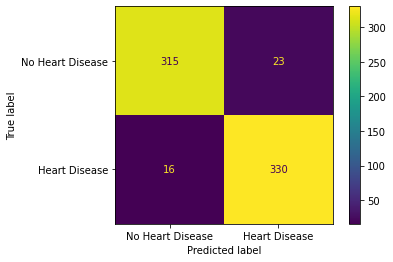

In [27]:
plot_confusion_matrix(clf_svm,                                                  #Confusion Matrix for training set
                      X_train_scaled,
                      y_train,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)                                                                               

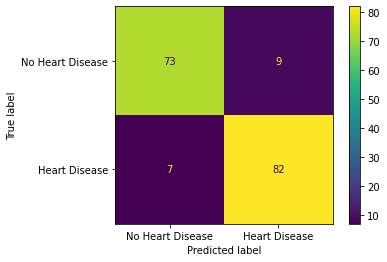

In [28]:
plot_confusion_matrix(clf_svm,                                                  #Confusion Matrix for testing set
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)        

In [32]:
pred_test=clf_svm.predict(X_test_scaled)
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.90      0.92      0.91        89

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



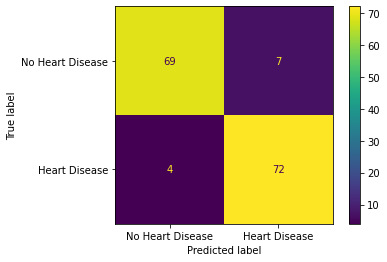

In [33]:
plot_confusion_matrix(clf_svm,                                                  #Confusion Matrix for validation set
                      X_val_scaled,
                      y_val,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)        

In [36]:
pred_val=clf_svm.predict(X_val_scaled)
print(metrics.classification_report(y_val,pred_val))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        76
           1       0.91      0.95      0.93        76

    accuracy                           0.93       152
   macro avg       0.93      0.93      0.93       152
weighted avg       0.93      0.93      0.93       152



**GridSearchCV for Hyperparameter tuning**

In [38]:
pram_grid=[
           {'C':[40,45,35],
            'gamma':[0.01, 1,0.1, 'scale'],
            'kernel':['rbf']
           }
]

In [39]:
optimal_param= GridSearchCV(
    SVC(),
    pram_grid,
    cv=5,
    scoring='recall',
    verbose=0
)

In [40]:
optimal_param.fit(X_train_scaled, y_train)
print(optimal_param.best_params_)

{'C': 40, 'gamma': 1, 'kernel': 'rbf'}


In [41]:
clf_svm=SVC(random_state=42, C=40, gamma=1, kernel='rbf')
clf_svm.fit(X_train_scaled, y_train)

SVC(C=40, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

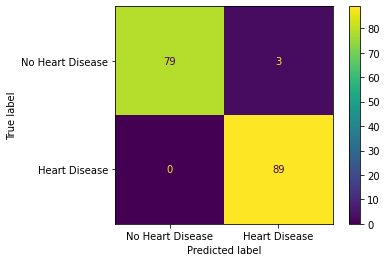

In [42]:
plot_confusion_matrix(clf_svm,                                                  #Confusion Matrix for test set
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)

In [43]:
pred_test_tuned=clf_svm.predict(X_test_scaled)
print(metrics.classification_report(y_test,pred_test_tuned))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        82
           1       0.97      1.00      0.98        89

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



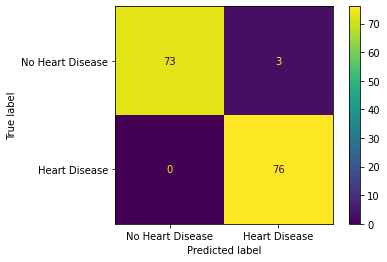

In [44]:
plot_confusion_matrix(clf_svm,                                                  #Confusion Matrix for validation set
                      X_val_scaled,
                      y_val,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)

In [45]:
pred_val_tuned=clf_svm.predict(X_val_scaled)
print(metrics.classification_report(y_val,pred_val_tuned))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.96      1.00      0.98        76

    accuracy                           0.98       152
   macro avg       0.98      0.98      0.98       152
weighted avg       0.98      0.98      0.98       152

